In [17]:
import pandas as pd
import numpy as np
import altair as alt
import matplotlib.pyplot as plt


In [18]:
chart_toppers = pd.read_csv('chart_toppers.csv')
top10_albums = pd.read_csv('Top10_Albums.csv')

In [19]:
print(chart_toppers.shape)
print(top10_albums.shape)

(52, 5)
(10, 3)


In [20]:
print(chart_toppers.columns)
print(top10_albums.columns)


Index(['Issue date', 'Song', 'Artist(s)', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')
Index(['Artist', 'Album', 'units'], dtype='object')


In [21]:
#counts number of times each unique artist topped a chart
viz1 = chart_toppers['Artist(s)'].value_counts()
viz1 = viz1.reset_index()
viz1.columns = ['Artist', 'Count']
viz1.head(50)

,Artist,Count
0,Morgan Wallen,16
1,Miley Cyrus,8
2,Taylor Swift,7
3,Mariah Carey,3
4,Doja Cat,3
5,Olivia Rodrigo,2
6,Oliver Anthony Music,2
7,Brenda Lee,2
8,SZA,1
9,Jason Aldean,1


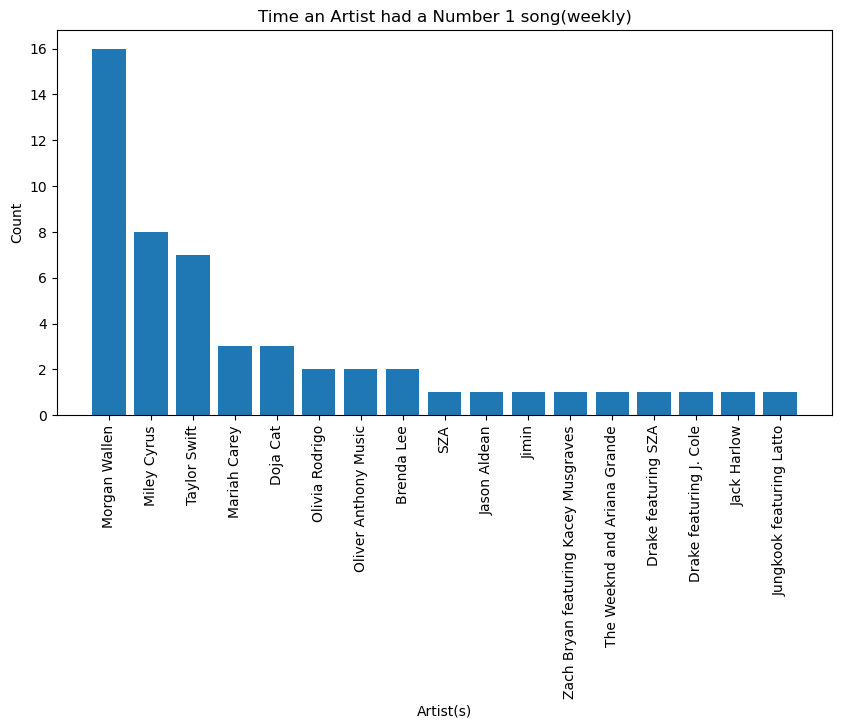

In [22]:

plt.figure(figsize=(10, 5))
plt.bar(viz1['Artist'], viz1['Count'])
plt.xticks(rotation=90)
plt.xlabel('Artist(s)')
plt.ylabel('Count')
plt.title('Time an Artist had a Number 1 song(weekly)')
plt.show()


In [23]:


df = top10_albums
df = df[(df['Artist'] == ' Taylor Swift') | (df['Artist'] == ' Morgan Wallen')]

donut_chart = alt.Chart(df).mark_arc(innerRadius=50).encode(
    theta=alt.Theta(field="units", type="quantitative"),
    color=alt.Color(field="Artist", type="nominal"),
    tooltip=[alt.Tooltip('Album:N', title='Album'),
             alt.Tooltip('units:Q', title='Units Sold', format=',')]
).properties(
    title="Album Units Sold by Taylor Swift and Morgan Wallen"
)

donut_chart.display()

/opt/anaconda3/lib/python3.11/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

In [24]:
#removing taylors version from donut graph
filtered_df = df[~df['Album'].str.contains(r"\(Taylor’s Version\)", regex=True)]

donut_chart = alt.Chart(filtered_df).mark_arc(innerRadius=50).encode(
    theta=alt.Theta(field="units", type="quantitative"),
    color=alt.Color(field="Artist", type="nominal"),
    tooltip=[alt.Tooltip('Album:N', title='Album'),
             alt.Tooltip('units:Q', title='Units Sold', format=',')]
).properties(
    title="Album Units Sold by Taylor Swift and Morgan Wallen Excluding Taylors Version Album"
)

donut_chart.display()

/opt/anaconda3/lib/python3.11/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)